In [2]:
from pathlib import Path
import pandas as pd

csv_path = 'benchmark_data/s4-large-edits.csv'
print(f"Loading: {csv_path}")
df = pd.read_csv(csv_path)
print(f"Rows: {len(df):,}  Columns: {len(df.columns):,}")

Loading: benchmark_data/s4-large-edits.csv
Rows: 10  Columns: 9


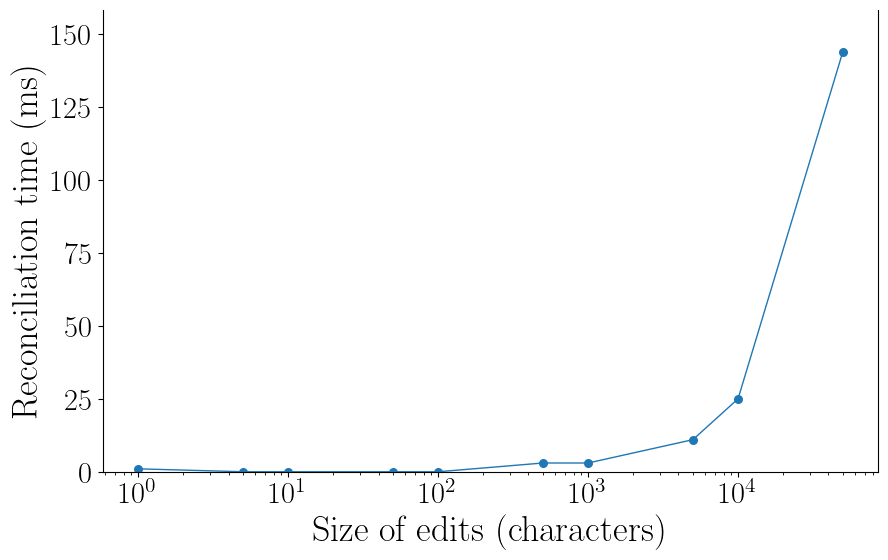

In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

# Matplotlib/LaTeX settings
mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": [],  # let LaTeX pick the default serif (Times)
    "text.latex.preamble": r"\usepackage{amsmath}",
    "axes.titlesize" : 28,
    "axes.labelsize" : 26,
    "lines.linewidth" : 5,
    "lines.markersize" : 18,
    "xtick.labelsize" : 22,
    "ytick.labelsize" : 22,
    "legend.fontsize": 20
})

# Ensure output directory exists
output_dir = 'benchmark_plots'
os.makedirs(output_dir, exist_ok=True)

size_col = "editSize"
time_col = "remoteApplyTimeMs"

plot_df = df[[size_col, time_col]].copy()

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_ylabel('Reconciliation time (ms)')
ax.set_xlabel('Size of edits (characters)')
ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_ylim(top=max(1.1*plot_df[time_col]))

ax.scatter(plot_df[size_col], plot_df[time_col], s=30)
ax.plot(plot_df[size_col], plot_df[time_col], linewidth=1)

#plt.grid(True, which="both", linestyle=":", linewidth=0.6)

ax.set_xscale("log")

# Save and show
plt.savefig(f'{output_dir}/s4.svg',bbox_inches='tight')
plt.savefig(f'{output_dir}/s4.pdf',bbox_inches='tight')
plt.show()